BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹 문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음

기존방식과의 차이점
- 정규 표현식, 문자열 함수 등을 활용하여 홈페이지 텍스트 내 패턴을 분석하여 하나씩 원하는 데이터를 찾아가는 형식
- BS는 HTML 문서를 태그를 기반으로 구조화하여 태그로 원하는 데이터를 찾아가는 형식


In [3]:
html_doc = """
<html lang="en">
<head><title>crawl</title></head>
<body>
<p class="a" align="center"> text1</p>
<p class="b" align="center"> text2</p>
<p class="c" align="center"> text3</p>
<div><img src="/source" width="300" height="200"></div>
</body>
</html>
"""
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_doc, 'html.parser')
print(soup.prettify())

<html lang="en">
 <head>
  <title>
   crawl
  </title>
 </head>
 <body>
  <p align="center" class="a">
   text1
  </p>
  <p align="center" class="b">
   text2
  </p>
  <p align="center" class="c">
   text3
  </p>
  <div>
   <img height="200" src="/source" width="300"/>
  </div>
 </body>
</html>



In [4]:
html = """
<html><body>
  <h1>스크레이핑이란?</h1>
  <p>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling
p3 = p1.next_sibling.next_sibling.next_sibling
print(h1.string)
print(p1.string)
print(p2.string)
print(p3.string)

스크레이핑이란?
웹 페이지를 분석하는 것
원하는 부분을 추출하는 것




find() : 
- HTML의 해당 태그에 대한 첫 번째 정보를 가져옴
- find(속성='값') : HTML 해당 속성과 일치하는 값에 대한 첫 번째 정보를 가져옴

find_all() : 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴. limit 옵션으로 개수 지정 가능
- CSS 속성으로 필터링(class_로 클래스를 직접 사용 혹은 attrs에서 속성 = 값으로 필터링)


In [5]:
html = """
<html><body>
  <h1 id='title'>스크레이핑이란?</h1>
  <p id='body'>웹 페이지를 분석하는 것</p>
  <p>원하는 부분을 추출하는 것</p>
</body></html>
"""
soup = BeautifulSoup(html, 'html.parser')
title = soup.find(id='title')
body = soup.find(id='body')

print(title.string, type(title.string))
print(body.string)
print(title.text, type(title.text))
print(body.text)
print(body.get_text())

스크레이핑이란? <class 'bs4.element.NavigableString'>
웹 페이지를 분석하는 것
스크레이핑이란? <class 'str'>
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것


In [6]:
texts = soup.findAll('p')
for t in texts:
    print(t.text)

웹 페이지를 분석하는 것
원하는 부분을 추출하는 것


In [7]:
#urlopen()과 Beautifulsoup의 조합
from bs4 import BeautifulSoup
import urllib.request as req
url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
title = soup.find('title').string
wf = soup.find('wf').string
print(title,'\n')
print(wf)

기상청 육상 중기예보 

○ (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. <br />○ (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다.<br />○ (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. <br />              아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다.<br /><br />* 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


C:\Users\admin\Anaconda3\envs\cakd7\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [19]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣]', " ",wf)
wf

'  (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다          (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다         (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다                      아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다               이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥 번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다 '

#### 과제0722_2
wf를 다시 정렬하여 불필요한 부분을 제거해서 아래와 같은 형식으로 출력하세요.

In [21]:
import requests
import re

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
wf = soup.find('wf').string
wf = re.sub('[^0-9가-힣(),.~]', " ",wf)
wf = re.sub('\s+', " ", wf)
wf

' (강수) 30일(토)은 전라권에 소나기가 오는 곳이 있겠습니다. (기온) 이번 예보기간 아침 기온은 22~26도, 낮 기온은 29~34도로 어제(24일, 아침최저기온 22~24도, 낮최고기온 25~32도)보다 높겠습니다. (주말전망) 30일(토)은 전라권에 소나기가 오는 곳이 있겠고, 31일(일)은 중부지방은 대체로 맑겠으며 남부지방과 제주도는 구름많겠습니다. 아침 기온은 23~25도, 낮 기온은 31~34도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 소나기가 내리는 구역이 변동될 수 있으며, 돌풍과 함께 천둥.번개를 동반한 강한 소나기가 내리는 곳이 있겠으니 안전에 유의하기 바라며, 앞으로 발표되는 기상정보를 참고하기 바랍니다.'

'(강수) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다. 27일(수)은 수도권과 강원영서에 비가 오겠습니다.(기온) 이번 예보기간 아침 기온은 22~26도로 어제(19일, 아침최저기온 20~24도)보다 조금 높겠고, 낮 기온은 28~34도로 어제(낮최고기온 27~34도)와 비슷하겠습니다.(주말전망) 23일(토) 오후부터 24일(일) 오전 사이 전국에 비가 오겠고, 강원영동은 24일(일) 오후까지 이어지는 곳이 있겠습니다.


In [11]:
texts = soup.find_all('wf')
for t in texts:
    t = t.text
    t = re.sub('[^0-9가-힣]',' ', t)
    print(t, '\n')

   강수  27일 수 은 수도권과 강원영서에 비가 오겠습니다           기온  이번 예보기간 아침 기온은 22 25도  낮 기온은 29 34도로 어제 21일  아침최저기온 20 24도  낮최고기온 23 32도 보다 높겠습니다               이번 예보기간 북태평양고기압의 발달 여부와 정체전선의 위치에 따라 강수 구역이 변동될 수 있으며  정체전선의 영향권에서 벗어난 지역에도 대기 불안정으로 소나기가 내릴 가능성이 있겠으니  앞으로 발표되는 기상정보를 참고하기 바랍니다  

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

맑음 

구름많음 

구름많고 비 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

맑음 

구름많음 

구름많음 

구름많음 

구름많고 비 

구름많음 

구름많음 

구름많음 

구름많음 

구름많음 

흐림 

흐림 

구름많음 

구름많음 

흐림 

흐림 

구름많

In [25]:
req = requests.get('https://naver.com')
html = req.text

soup = BeautifulSoup(html, 'html.parser')
# result = soup.find_all('a', 'api_link')
# result = soup.find_all('span', class_='blind')[0]
result = soup.find_all('span', attrs={'class':'fix'})
result



[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [29]:
import re

req = requests.get('https://naver.com')
soup = BeautifulSoup(html, 'html.parser')
print(soup.find_all(string = '네이버'))
print(soup.find_all(string = re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "본 포스팅은 '디올 뷰티'로부터 제품과 소정의 원고료를 제공 받은 후, 솔직하게 작성된 제품 후기입니다. 안녕하세요 네이버 인플루언서 나날뷰티 입니다 :) 지난번 #디올포에버파운데이션 을 보여드린 후 바로 #인생파데 로 등극해 ㅎㅎ 꾸준히 잘 쓰고 있는데요~(짱좋) 요즘 날씨가 정말 덥고 습해서 ㅠ 더욱 더 지속력 좋은 메이크업을 다들 원하시니.. #디올파", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


select_one(), select()
- CSS 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find, find_all과 비슷함)
- class는 ., id는 #로 표시


In [29]:
import urllib.request as req
url = "https://finance.naver.com/marketindex/"
res = req.urlopen(url)
soup = BeautifulSoup(res, 'html.parser')
price = soup.select_one('#exchangeList > li.on > a.head.usd > div > span.value').string
print('usd/krw=', price)

usd/krw= 1,309.00


In [30]:
html_doc = """<html><head><title>The Dormouse's story</title></head>
<body>
<div></div>
<p class="title"><b>The Dormouse's story</b></p>

<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>

<p class="story">...</p>
"""


In [31]:
!pip install lxml

In [34]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html_doc, 'html.parser') #lxml
print(bs.prettify())

<html>
 <head>
  <title>
   The Dormouse's story
  </title>
 </head>
 <body>
  <div>
  </div>
  <p class="title">
   <b>
    The Dormouse's story
   </b>
  </p>
  <p class="story">
   Once upon a time there were three little sisters; and their names were
   <a class="sister" href="http://example.com/elsie" id="link1">
    Elsie
   </a>
   ,
   <a class="sister" href="http://example.com/lacie" id="link2">
    Lacie
   </a>
   and
   <a class="sister" href="http://example.com/tillie" id="link3">
    Tillie
   </a>
   ;
and they lived at the bottom of a well.
  </p>
  <p class="story">
   ...
  </p>
 </body>
</html>


In [36]:
bs.title

<title>The Dormouse's story</title>

In [37]:
bs.title.name

'title'

In [38]:
bs.title.parent.name

'head'

In [39]:
bs.p

<p class="title"><b>The Dormouse's story</b></p>

In [42]:
bs.find_all('a')

[<a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a>,
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>]

In [46]:
bs.find(id='link3')

<a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>

In [50]:
bs.a['class']

['sister']

In [51]:
for link in bs.find_all('a'):
    print(link.get('href'))

http://example.com/elsie
http://example.com/lacie
http://example.com/tillie


In [53]:
bs.find_all('p')

[<p class="title"><b>The Dormouse's story</b></p>,
 <p class="story">Once upon a time there were three little sisters; and their names were
 <a class="sister" href="http://example.com/elsie" id="link1">Elsie</a>,
 <a class="sister" href="http://example.com/lacie" id="link2">Lacie</a> and
 <a class="sister" href="http://example.com/tillie" id="link3">Tillie</a>;
 and they lived at the bottom of a well.</p>,
 <p class="story">...</p>]

#### string vs. get_text()
- get_text()를 이용하면 한방에 현재 HTML 문서의 모든 텍스트를 추출할 수 있습니다. 조금 더 정확히 표현하면 get_text() 메서드는 현재 태그를 포함하여 모든 하위 태그를 제거하고 유니코드 텍스트만 들어있는 문자열을 반환
- string의 경우 문자열이 없으면 None을 출력하지만, get_text()의 경우 유니코드 형식으로 텍스트까지 문자열로 반환하기 때문에  아무 정보도 출력되지 않는다.
- string 속성은 태그(tag) 내 문자열을 반환. get_text()를 사용하더라도 정확하게 문자열을 추출하기 위해서는 항상 마지막 태그에 메서드를 사용


In [62]:
bs = BeautifulSoup(html_doc, 'html.parser')

In [63]:
print(bs.string)

None


In [64]:
print(bs.get_text())

The Dormouse's story


The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [66]:
print(bs.find('div').string)

None


In [67]:
print(bs.find('div').get_text())

In [69]:
print(bs.find('body').string)

None


In [72]:
print(bs.find('body').get_text())



The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...



In [73]:
bs.a.string

'Elsie'

In [76]:
li = bs.find_all('p')
for i in li:
    print(i.string)

The Dormouse's story
None
...


In [77]:
for i in li:
    print(i.get_text())

The Dormouse's story
Once upon a time there were three little sisters; and their names were
Elsie,
Lacie and
Tillie;
and they lived at the bottom of a well.
...


#### urllib + bs

In [6]:
import urllib.request as rq
url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p')
text = text.get_text()
text

'AiRS추천으로 구성된 뉴스를 제공합니다.'

In [7]:
print(bs.find('div').find('a').string)

메인 메뉴로 바로가기


In [8]:
items = bs.find('div').find_all('a')
for item in items:
    print(item.get_text())


메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스



'사적채용 논란' 대통령실 9급 직원 부친, 강릉선관위원직 사의
'사적채용 논란' 대통령실 행정요원의 부친 강릉시선관위원직 사의
채용 논란 우 모 행정요원 부친, 선관위원 사의 표명
`사적채용 논란` 대통령실 9급 직원 부친, 강릉선관위원직 사의
20개의 관련뉴스 더보기



尹 "경찰집단 반발은 중대한 국가 기강 문란 될 수 있다"(상보)
尹대통령 "치안 관서장 집단행동 깊은 우려…중대 국가기강문란"
[속보]尹대통령, '경찰의 난'에 "집단 반발, 중대한 국가 기강문란"
[속보] 尹대통령 “서장들 집단 행동 깊은 우려... 중대 기강 문란”
9개의 관련뉴스 더보기


동영상기사

한동훈·이상민 공세 퍼부은 민주당, 강제북송 역공한 국힘
[영상] 박범계-한동훈 국회서 설전…"왕중의 왕 vs 얘기 안돼"
박범계 "법무부장관 1인 지배 시대" VS 한동훈 "인사 검증만 보조"…전·현직 법무부장관 맞불
맞붙은 박범계·한동훈…“인사권 맘대로” vs “본인도 패싱하지 않았냐”
92개의 관련뉴스 더보기



‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계
설훈, '이재명 셀프 공천' 논란에 "누가 봐도 이상하다"
非明 “이재명, 계양을 셀프공천 해명해야”… 李, 대응 피한채 尹때리기
'사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명
18개의 관련뉴스 더보기



한덕수 총리 "경찰서장 회의, 상사명령 불복‥있을 수 없는 일"



한 총리 "경찰서장 회의, 상사 명령 불복한 것…있을 수 없는 일"
11개의 관련뉴스 더보기



한동훈, 김건희 '무혐의'·김혜경 '압수수색' 어떻게 방

In [9]:
items = bs.find('div').find_all('a')
for item in items:
    wt = re.sub(r'\n*', '', item.get_text())
    print(wt)

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리
정치
대통령실 
국회/정당 
북한 
행정 
국방/외교 
정치일반 


안내헤드라인 뉴스

'사적채용 논란' 대통령실 9급 직원 부친, 강릉선관위원직 사의
'사적채용 논란' 대통령실 행정요원의 부친 강릉시선관위원직 사의
채용 논란 우 모 행정요원 부친, 선관위원 사의 표명
`사적채용 논란` 대통령실 9급 직원 부친, 강릉선관위원직 사의
20개의 관련뉴스 더보기

尹 "경찰집단 반발은 중대한 국가 기강 문란 될 수 있다"(상보)
尹대통령 "치안 관서장 집단행동 깊은 우려…중대 국가기강문란"
[속보]尹대통령, '경찰의 난'에 "집단 반발, 중대한 국가 기강문란"
[속보] 尹대통령 “서장들 집단 행동 깊은 우려... 중대 기강 문란”
9개의 관련뉴스 더보기
동영상기사
한동훈·이상민 공세 퍼부은 민주당, 강제북송 역공한 국힘
[영상] 박범계-한동훈 국회서 설전…"왕중의 왕 vs 얘기 안돼"
박범계 "법무부장관 1인 지배 시대" VS 한동훈 "인사 검증만 보조"…전·현직 법무부장관 맞불
맞붙은 박범계·한동훈…“인사권 맘대로” vs “본인도 패싱하지 않았냐”
92개의 관련뉴스 더보기

‘민생 메시지’ 올인하는 이재명…‘이재명 때리기’ 올인하는 비명계
설훈, '이재명 셀프 공천' 논란에 "누가 봐도 이상하다"
非明 “이재명, 계양을 셀프공천 해명해야”… 李, 대응 피한채 尹때리기
'사법리스크'에 '셀프 공천' 논란까지, 악재 겹친 이재명
18개의 관련뉴스 더보기

한덕수 총리 "경찰서장 회의, 상사명령 불복‥있을 수 없는 일"

한 총리 "경찰서장 회의, 상사 명령 불복한 것…있을 수 없는 일"
11개의 관련뉴스 더보기

한동훈, 김건희 '무혐의'·김혜경 '압수수색' 어떻게 방어했나

"도이치 수사는?"

In [10]:
# re.sub('[\n+]', '', items)

In [27]:
itemes = bs.find('div').find_all('a')
li = []
for item in itemes:
    li.append(item.get_text())
a = (' ').join(li)
wt1 = re.sub('[^\w+()''.]', ' ', a)
wt2 = re.sub('\s+', ' ', wt1)
print(wt2)

메인 메뉴로 바로가기 본문으로 바로가기 검색 NAVER 뉴스 TV연예 스포츠 날씨 프리미엄 언론사별 정치 선택됨 경제 사회 생활 문화 IT 과학 세계 랭킹 신문보기 오피니언 TV 팩트체크 전체 언론사 뉴스스탠드 라이브러리 전체 언론사 뉴스스탠드 라이브러리 정치 대통령실 국회 정당 북한 행정 국방 외교 정치일반 안내헤드라인 뉴스 사적채용 논란 대통령실 9급 직원 부친 강릉선관위원직 사의 사적채용 논란 대통령실 행정요원의 부친 강릉시선관위원직 사의 채용 논란 우 모 행정요원 부친 선관위원 사의 표명 사적채용 논란 대통령실 9급 직원 부친 강릉선관위원직 사의 20개의 관련뉴스 더보기 尹 경찰집단 반발은 중대한 국가 기강 문란 될 수 있다 (상보) 尹대통령 치안 관서장 집단행동 깊은 우려 중대 국가기강문란 속보 尹대통령 경찰의 난 에 집단 반발 중대한 국가 기강문란 속보 尹대통령 서장들 집단 행동 깊은 우려... 중대 기강 문란 9개의 관련뉴스 더보기 동영상기사 한동훈 이상민 공세 퍼부은 민주당 강제북송 역공한 국힘 영상 박범계 한동훈 국회서 설전 왕중의 왕 vs 얘기 안돼 박범계 법무부장관 1인 지배 시대 VS 한동훈 인사 검증만 보조 전 현직 법무부장관 맞불 맞붙은 박범계 한동훈 인사권 맘대로 vs 본인도 패싱하지 않았냐 92개의 관련뉴스 더보기 민생 메시지 올인하는 이재명 이재명 때리기 올인하는 비명계 설훈 이재명 셀프 공천 논란에 누가 봐도 이상하다 非明 이재명 계양을 셀프공천 해명해야 李 대응 피한채 尹때리기 사법리스크 에 셀프 공천 논란까지 악재 겹친 이재명 18개의 관련뉴스 더보기 한덕수 총리 경찰서장 회의 상사명령 불복 있을 수 없는 일 한 총리 경찰서장 회의 상사 명령 불복한 것 있을 수 없는 일 11개의 관련뉴스 더보기 한동훈 김건희 무혐의 김혜경 압수수색 어떻게 방어했나 도이치 수사는 金여사 겨눈 박범계 한동훈 전 정권부터 1년여 수사 곧 결론 날 것 8개의 관련뉴스 더보기 장진호전투 영웅 옴스테드 美예비역 중장 별세 尹 대통령 장진호 영웅 조전 

#### 과제0725-1
상기 출력물을 불필요한 공백 없이 정렬하여 출력하세요.

In [110]:
items = bs.find('div', id='header').find_all('a')
for item in items:
    print(item.get_text())

메인 메뉴로 바로가기
본문으로 바로가기
검색
NAVER
뉴스
TV연예
스포츠
날씨
프리미엄
언론사별 
정치 선택됨
경제 
사회 
생활/문화 
IT/과학 
세계 
랭킹 
신문보기 
오피니언 
TV 
팩트체크 
전체 언론사
뉴스스탠드
라이브러리
전체 언론사
뉴스스탠드
라이브러리


In [260]:
texts = bs.find_all('p')
for t in texts:
#     print(t.string)
    print(t.get_text())
    

AiRS추천으로 구성된 뉴스를 제공합니다.
오전 11시~오후 12시까지 집계한 결과입니다.
본 콘텐츠의 저작권은 제공처 또는 네이버에 있으며 이를 무단 이용하는 경우 저작권법 등에 따라 법적책임을 질 수 있습니다.


In [302]:
import urllib.request as rq
import re

url = 'https://news.naver.com'
html = rq.urlopen(url)
bs = BeautifulSoup(html, 'lxml')
bs1 = bs.get_text()

p = re.sub('[^가-힣]',' ', bs1)
p1 = re.sub('\s+',' ', p)
print(p1)



 네이버 뉴스 본문 바로가기 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 아시아경제 월 일 구독 피겨여왕 김연아 성악가 고우림과 월 결혼 피겨여왕 김연아 가 오는 월 결혼한다 김연아의 소속사 올댓스포츠는 일 김연아가 오는 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 밝혔다 김연아의 피앙세인 고우림은 서울대 주간경향 월 일 구독 경계에 선 청춘의 험난한 취업 여정 한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 세대가 있다 본인 또는 부모가 외국으로부터 이주한 경험이 있는 이주배경 청년 이다 여기서 이주 란 중국 베트남 몽골 러시아 등 외 코리아중앙데일리 월 일 구독 주간조선 월 일 구독 김연아 연하 성악가 고우림과 결혼 년 열애 어떻게 숨겼나 한국 스포츠계의 슈퍼스타 김연아가 오는 월 살 연하 성악가와 결혼한다 김연아의 매니지먼트사인 올댓스포츠는 일 보도자료를 통해 김연아가 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 채널 월 일 구독 박범계 한동훈에 법치농단 따져 묻겠다 윤석열 정부의 첫 대정부질문 질의자로 나서는 박범계 더불어민주당 의원이 한동훈 법무부장관에게 법치농단 하는 이유를 따져 묻겠다고 밝혔습니다 박 의원은 오늘 일 라디오 김현정의 뉴스쇼 에서 현재 법 새로보기 시사저널 월 일 구독 오르는 금리 떨어지는 집값 영끌족 상환 부담에 비상 영끌족 대출금리 월부터 원리금 만원 부담 전체 가계대출 중 세대 비중 대보다 높아 대출금리가 포인트나 올랐습니다 대 남성 씨는 년 경기 전주 월 일 구독 전북교육청 지방공무원 임용 필기시험 합격자 발표 전라북도교육청이 지방공무원 필기시험 합격자를 발표했습니다 전북교육청은 교육행정 직군에서 명 전산과 사서 공업 등 나머지 개 분야에서 명 등 총 명의 필기시험 합격자를 결정했으며 이들을 대상으 아

In [288]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
text = bs.get_text()

p = '[가-힣]+'

regrex = re.compile(p)
result = regrex.findall(text)
result


['네이버',
 '뉴스',
 '본문',
 '바로가기',
 '뉴스',
 '연예',
 '스포츠',
 '날씨',
 '프리미엄',
 '검색',
 '언론사별',
 '정치',
 '경제',
 '사회',
 '생활',
 '문화',
 '과학',
 '세계',
 '랭킹',
 '신문보기',
 '오피니언',
 '팩트체크',
 '전체',
 '언론사',
 '뉴스스탠드',
 '라이브러리',
 '콘텐츠',
 '월',
 '전체',
 '언론사',
 '뉴스스탠드',
 '라이브러리',
 '언론사편집',
 '기자',
 '연재',
 '구독설정',
 '일다',
 '월',
 '일',
 '구독',
 '몇',
 '년씩',
 '감금',
 '아이와',
 '격리',
 '이렇게까지',
 '해야',
 '하나',
 '일본',
 '출입국관리소에',
 '수용된',
 '외국인',
 '여성들을',
 '만나온',
 '오다',
 '아사히',
 '씨는',
 '출입국관리',
 '체계와',
 '수용시설의',
 '문제점을',
 '지적하는',
 '활동을',
 '하고',
 '있다',
 '출입국관리',
 '시스템에',
 '의해',
 '수용된',
 '여성들의',
 '실태를',
 '오다',
 '씨가',
 '직접',
 '전한다',
 '데일리안',
 '월',
 '일',
 '구독',
 '우영우',
 '감동',
 '속',
 '그',
 '팽나무',
 '실제',
 '장소',
 '창원서',
 '인기',
 '인증샷',
 '이어져',
 '경남',
 '창원에',
 '있는',
 '거대한',
 '팽나무가',
 '최근',
 '인증샷',
 '명소로',
 '인기몰이',
 '중이다',
 '최근',
 '화제인',
 '드라마',
 '이상한',
 '변호사',
 '우영우',
 '에',
 '등장한',
 '이후로',
 '입소문을',
 '타서다',
 '지난',
 '일',
 '방송된',
 '이상한',
 '변호사',
 '우영우',
 '회에는',
 '팽나',
 '미디어오늘',
 '월',
 '일',
 '구독',
 '국민의힘',
 '수신료',
 '폐지주장에',
 '비전문가적',
 '주장',
 '

In [303]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
text = str(bs)

result = re.findall('[가-힣]+', text)
result = ' '.join(result)
result

'네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 네이버 네이버 뉴스 네이버 뉴스 네이버 뉴스 정치 경제 사회 생활 문화 세계 과학 등 언론사별 분야별 뉴스 기사 제공 본문 바로가기 구분 뉴스 연예 스포츠 날씨 프리미엄 검색 언론사별 정치 경제 사회 생활 문화 과학 세계 랭킹 신문보기 오피니언 팩트체크 전체 언론사 뉴스스탠드 라이브러리 콘텐츠 월 전체 언론사 뉴스스탠드 라이브러리 언론사편집 기자 연재 구독설정 코리아중앙데일리 월 일 코리아중앙데일리 구독 주간경향 월 일 주간경향 구독 경계에 선 청춘의 험난한 취업 여정 한국사회에서 함께 살아가고 있지만 차별과 배제를 일상적으로 겪는 이주민 세대가 있다 본인 또는 부모가 외국으로부터 이주한 경험이 있는 이주배경 청년 이다 여기서 이주 란 중국 베트남 몽골 러시아 등 외 지디넷코리아 월 일 지디넷코리아 구독 일론 머스크 구글 창업자 세르게이 브린 아내와 불륜 일론 머스크 테슬라 최고경영자 가 친한 친구이던 세르게이 브린 구글 공동창업자의 아내와 불륜을 저질렀다고 월스트리트저널 이 일 현지시간 보도했다 보도에 따르면 세르게이 브린은 지난 월 아내 니 국민일보 월 일 국민일보 구독 피겨여왕 김연아 살 연하 고우림과 월 결혼 피겨여왕 김연아 가 오는 월 결혼한다 김연아의 매니지먼트사인 올댓스포츠는 일 김연아가 오는 월 하순 서울 모처에서 성악가 고우림 과 화촉을 밝힌다 고 발표했다 결혼식 장소는 신라호텔인 것으 국제신문 월 일 국제신문 구독 행안부 경찰 총경 회의 대단히 부적절 평검사 회의와 달라 행정안전부가 경찰 총경 회의에 대해 대단히 부적절하고 적법한 직무명령에 불복종한 사안 이라며 경찰청에서 위법성에 대해 엄정하게 조사하고 후속처리할 것으로 생각한다 는 입장을 밝혔다 이상민 행안부 장관은 일 새로보기 월 일 구독 동영상 재생시간 이상한 변호사 우영우 팽나무 천연기념물 지정 조사 문화재청은 인기리에 방송 중인 이상한 변호사 우영우 에 등장한 팽나무의 문화재적 가치를

In [310]:
import urllib.request as rq
import re

url= 'https://news.naver.com'
html = rq.urlopen(url)
bs= BeautifulSoup(html,'lxml')
texts = bs.find_all('p')
for t in texts:
#     print(t.string, '\n')
    print(t.get_text(), '\n')

6년 전 전석 매진작 배우·제작진 귀환 전무송·박정자·손숙 등 대배우들 조연 3040 젊은 배우들이 주연 맡아 현대적 외피 두른 정통극...배우들 열연 빛나 '여성혐오' 지적 받는 원작 속 가부장 사회 수동적인 여성 

근육을 유지하고 강화하는데 좋은 음식으로 닭가슴살이 꼽힌다. 하지만 퍽퍽한 맛이 단점이다. 건강을 위해 식단에 올려도 남기는 경우가 적지 않다. 공장에서 만든 단백질 보충제 형태보다는 자연 그대로의 음식이 좋은데 어 

#. 지난 4월 철거공사를 끝낸 서울 용산의 한 다세대주택(빌라). 건물 4개를 허문 자리에 각종 폐기물이 방치된 채로 공사장 인부들은 물론 포클레인 등 공사 장비가 3개월째 자취를 감춰버렸다. 건축비 상승으로 공사 

나홀로 세계여행 인도양의 보석, 몰디브비행기에서 몰디브의 산호초 섬들을 보는 순간, 숨이 멎었다. 사진으로 보던 모습과는 비교도 되지 않았다. 바다에는 비취빛 에메랄드들이 반짝이고 있었다. 비행기가 멈추었으면 하는  

중국 텐센트가 한국 게임산업협회 이사사로 가입한 것을 두고 게임업계가 시끄럽다. 중국 게임 회사가 한국에서 자유롭게 활동하는 데 반해, 중국에서는 한국 게임사의 활약이 제약을 받는 것을 두고 설왕설래가 오간다. 무역 

'피겨퀸' 김연아(32)와 성악가 고우림(27)이 오는 10월 결혼식을 올린다. 25일 김연아의 매니지먼트사인 올댓스포츠는 "김연아가 10월 서울 모처에서 성악가 고우림과 화촉을 밝힌다"고 밝혔다. 올댓스포츠는 "김 

지난해 코로나19로 인한 급락장 이후 대세 상승장의 기류에 올라탄 동학개미들의 활동력이 현저하게 떨어졌다. 잠재적 투자 자금인 예탁금은 올해 들어 부쩍 감소하고 있고 거래대금도 예년 수준에 미치지 못하는 상황에 마주 

신종 코로나바이러스 감염증(코로나19) 확산에 대응해 각국의 봉쇄조치가 가장 활발하게 이뤄졌던 2020년 4월 세계적으로 교통량은 41% 가량 감소했다. 해양교통량과 항공교통량은 각각 9%, 75% 정도 줄어들었다. 

전 피겨스케이팅 국가대표 선수

#### requests + bs

In [317]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
text = bs.find('p').get_text()
text


'중국 텐센트가 한국 게임산업협회 이사사로 가입한 것을 두고 게임업계가 시끄럽다. 중국 게임 회사가 한국에서 자유롭게 활동하는 데 반해, 중국에서는 한국 게임사의 활약이 제약을 받는 것을 두고 설왕설래가 오간다. 무역'

#### 과제 0725_2
기상청 육상 정보에서 강원도의 지역번호는 105번, 강원도의 날씨예보를 불필요한 공백을 제거한 후, 출력하세요.

In [28]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as rq

url = "https://testweather.kma.go.kr/w/weather/forecast/mid-term.do?stnId1=105"
r = rq.get(url)
html = r.text
# bs = BeautifulSoup(html, 'lxml')
# bss = bs.get_text()
# br = re.findall
br = re.findall('<li>○(.+)?</li>',html)
m = re.sub('[^\w+\d+(),.~]',' ',str(br))
m1 = re.sub('br',' ',m)
m2 = re.sub('\s+',' ',m1)
m2



' (하늘상태) 이번 예보기간에는 흐린 날이 많겠습니다. (기온) 이번 예보기간 아침 기온은 19~26도, 낮 기온은 26~33도로 어제(25일, 아침최저기온 19~23도, 낮최고기온 25~34도)와 비슷하겠습니다. (해상) 동해중부해상의 물결은 0.5~2.0m로 일겠습니다. (주말전망) 30일(토)~31일(일)은 가끔 구름많겠습니다. 아침 기온은 19~25도, 낮 기온은 27~33도가 되겠습니다. 이번 예보기간 동안 우리나라 주변 기압계에 따라 비 또는 소나기가 내리는 구역이 변동될 수 있으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다. '

In [ ]:
# import pandas as pd
# from bs4 import BeautifulSoup
# import requests as rq

# url = "https://testweather.kma.go.kr/w/weather/forecast/mid-term.do?stnId1=105"
# r = rq.get(url)
# html = r.text
# bs = BeautifulSoup(html, 'lxml')
# bss = bs.select()

In [598]:
import pandas as pd
from bs4 import BeautifulSoup
import requests as rq

url = "https://www.weather.go.kr/w/weather/forecast/short-term.do?stnId=105"
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
br = bs.select('span[class=depth_1], span[class=depth_2]')

for t in br:
    wt = re.sub(r'\n+', '', t.get_text())
    print(wt)
    


□  (종합) 무더위 유의, 모레까지 강원내륙.산지 소나기 곳, 돌풍과 천둥.번개 유의
○  (오늘) 가끔 구름많고, 강원남부산지 저녁(18~21시) 한때 소나기 곳
○  (내일) 가끔 구름많고, 오후(12~15시)부터 저녁(18~21시) 사이 강원영서 소나기 곳
○  (모레) 강원내륙과 산지 대체로 흐리다가 오후부터 가끔 구름많겠음, 강원동해안 대체로 맑음, 강원영서 오후(12~15시)부터 저녁(18~21시) 사이 소나기 곳
○  (글피) 강원영서 구름많음, 강원영동 대체로 흐림
□  소나기에 의한 예상 강수량
○  (25일)강원남부산지: 5~20mm
○  (26일)강원영서: 5~40mm


#### 과제0725_3. 
"http://www.naver.com" 사이트에서 span 태그에 연결된 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [477]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.text)

p = re.sub('[^가-힣]',' ', str(li))

p1 = re.sub('\s+',' ', p)
print(p1)


 뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 네이버 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 회차 당첨번호 추첨 지급기한 년 추첨 지급기한 년 원 원 바로가기 바로가기 추가 추가 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 개의 글 이전 다음 티빙 티빙 네이버 영화 네이버 영화 티빙 티빙 웨이브 웨이브 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 분 전 홀인러브 홀인러브 재생 재생시간 재생시간 일 전 이상한 변호사 우영우 이상한 변호사 우영우 재생 재생시간 재생시간 시간 전 돌싱글즈 돌싱글즈 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 디즈니 코리아 디즈니 코리아 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 재생 재생시간 재생시간 시간 전 조선 정신과 의사 유세풍 조선 정신과 의사 유세풍 재생 재생시간 재생시간 분 전 네이버 웹툰 네이버 웹툰 오후 시 업데이트 위 상승 현아 나빌레라 재생 가사 위 상승 있지 재생 가사 위 케이시 환혼 재생 가사 위 하락 초봄 에이핑크 초봄 재생 가사 위 상승 카더가든 환혼 재생 가사 위 상승 하은 포맨 입술 끝에 두고 온 말 재생 가사 위 상승 구원찬 유미의 세포들 시즌 재생 가사 위 하락 학번 스티커 사진 재생 가사 위 하락 재생 가사 위 상승 거미 환혼 재생 가사 재생 재생시간 재생시간 시간 전 돌싱글즈 돌싱글즈 재생

#### 과제0725_4. 
"http://www.naver.com" 사이트에서 span 태그에 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 출력하세요.


In [30]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
texts = bs.find_all('span')
li = []
for t in texts:
    li.append(t.text)
a = (' ').join(li)

p = re.sub('[^\w+\d+]',' ', a)
p1 = re.sub('\s+',' ', p)
print(p1)

뉴스스탠드 바로가기 주제별캐스트 바로가기 타임스퀘어 바로가기 쇼핑캐스트 바로가기 로그인 바로가기 매일 쓰는 브라우저 보안이 걱정된다면 안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요 매일 쓰는 브라우저 보안이 걱정된다면 다운로드 쥬니어네이버 해피빈 검색 한글 입력기 자동완성 레이어 txt txt date 삭제 설정이 초기화 된다면 도움말을 확인해주세요 설정이 초기화 된다면 도움말을 확인해주세요 도움말 도움말 자동저장 끄기 자동저장 끄기 5 회차 당첨번호 추첨 13 지급기한 1년 추첨 13 지급기한 1년 6 7 8 9 10 11 12 6 7 8 9 10 11 12 14 txt currency currency 8 9 8 9 6 원 6 원 txt 7 message 7 message 7 8 7 8 7 txt 5 5 바로가기 바로가기 txt 추가 txt date 추가 query intend intend 추가 자세히보기 도움말 신고 도움말 신고 자동완성 끄기 자동완성 끄기 쇼핑 쇼핑LIVE 24 0 33 0 이태원동 이태원동 리스트형 썸네일형 설정 이전 다음 닫기 닫기 이전 다음 닫기 닫기 이전 다음 다음 닫기 닫기 이전 다음 닫기 닫기 주제별로 분류된 다양한 글 모음 676 개의 글 이전 다음 김해나 김해나 닥터바이오 더마 코스메틱 닥터바이오 더마 코스메틱 5일 전 뷰스타 민슨 뷰스타 민슨 1개월 전 계피 계피 1주일 전 주플리 주플리 1주일 전 슈비둡 슈비둡 재생 재생시간14 03 재생시간 1개월 전 디렉터파이 디렉터파이 재생 재생시간13 23 재생시간 3개월 전 디렉터파이 디렉터파이 재생 재생시간19 51 재생시간 4개월 전 디렉터파이 디렉터파이 1주일 전 횬블리 횬블리 2개월 전 민됴 민됴 1주일 전 메이쥬니 메이쥬니 2주일 전 르미 르미 재생 재생시간14 43 재생시간 6개월 전 디렉터파이 디렉터파이 재생 재생시간00 29 재생시간 5개월 전 갓신상 갓신상 재생 재생시간21 06 재생시간 5개월 전 디렉터파이 디렉터파이 3주일 전 쥬니 쥬니 1주일 전 비비쥬

#### 과제0725-5 
"http://www.naver.com" 사이트에서 a 태그에 id가 있는 경우에 대하여 연결된 문자 + 숫자를 불필요한 공백을 제거한 후 한줄에 출력하세요.


In [44]:
from bs4 import BeautifulSoup
import requests as rq
import re

url = 'https://www.naver.com'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

# texts = bs.select('a[id]')

texts = bs.find_all('a', id=True)
print(texts)
li = []
for t in texts:
    li.append(t.text)
a = (' ').join(li)

p = re.sub('[^\w+\d+]',' ', a)
p1 = re.sub('\s+',' ', p)
print(p1)

[<a class="_2aeXMlrb BMgpjddw" data-clk="dropdownload1b" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #0436c7">다운로드</span></a>, <a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>, <a class="btn_keyboard" href="#" id="ke_kbd_btn" onclick="return false;" role="button"><span class="blind">한글 입력기</span><span class="ico_keyboard"></span></a>, <a aria-pressed="false" class="btn_arw _btn_arw fold" data-atcmp-element="" href="#" id="nautocomplete" role="button" tabindex="2"><span class="blind">자동완성 레이어</span><span class="ico_arr"></span></a>, <a class="btn_set" data-clk="tca.like" href="#" id="NM_THEME_EDIT_SET" role="button">관심주제 설정</a>, <a class="content_top" href="#wrap" id="NM_scroll_top_btn"><span class="blind">TOP</span></a>]
다운로드 네이버를 시작페이지로 한글 입력기 자동완성 레이어 관심주제 설정 TOP


#### 과제0725_6
url = 'https://news.naver.com/' 사이트 p태크에서 class가 cjs_ht인 데이터를 한글만을 불필요한 공백을 제거한 후 출력하세요.


In [47]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.naver.com/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

texts = bs.select('p[class = cjs_ht]')

p = re.sub('[^가-힣+.]',' ', str(texts))
p1 = re.sub('\s+',' ', p)
print(p1)

 오늘 언론사가 발행한 종이신문에 실린 뉴스 면 기사가 제공됩니다. 


In [52]:
from bs4 import BeautifulSoup
import urllib.request as rq

url = 'https://naver.com'
html = rq.urlopen(url)
bs=BeautifulSoup(html, 'lxml')

# print(bs.find('p'))
print(bs.find_all('p', limit=1), '\n')
print(bs.find_all('p', limit=2), '\n')
print(bs.find_all('p', limit=3))

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>] 

[<p class="dsc">
<i class="imsc ico_election"></i><span class="_alert_passage"></span>
</p>, <p class="dsc">ON/OFF 설정은<br/>해당기기(브라우저)에 저장됩니다.</p>, <p class="dsc"><em class="txt">동일한 시간대/연령/남녀별</em> 사용자 그룹의<br/>관심사에 맞춰 자동완성을 제공합니다.</p>]


In [63]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.find('h2', id='mainContent').text
title

'정치'

In [55]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://news.daum.net/politics/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select_one('#gnbContent > div > ul > li.on > a > span').text
title

'정치'

In [125]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.find('img', alt="외계+인 1부")
title

<img alt="외계+인 1부" height="91" onerror="this.src='https://ssl.pstatic.net/static/movie/2012/06/dft_img64x91.png'" src="https://movie-phinf.pstatic.net/20220708_75/16572722362230AyHS_JPEG/movie_image.jpg?type=f64_91" width="64"/>

In [126]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select('#boxofficeTooltip1 > div > div.tooltip > p')
title

[]

In [117]:
from bs4 import BeautifulSoup
import requests as rq

url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=192151#'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select_one('#content > div.article > div.mv_info_area > div.mv_info > h3 > a:nth-child(1)').text
title

'외계+인 1부'

##### 과제0726_1
네이버 영화 랭킹 가져와서 조회순 전체 영화 제목을 50개를 출력하세요.(출력방식 1위 : 외계+인 1부)

In [367]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'
html = rq.get(url)
html = html.text
bs=BeautifulSoup(html, 'lxml')
title = bs.select('#old_content > table > tbody > tr > td > div > a')
for i,t in enumerate(title):
    print(f'{i+1}위 : {t.text}')

1위 : 외계+인 1부
2위 : 탑건: 매버릭
3위 : 한산: 용의 출현
4위 : 헤어질 결심
5위 : 범죄도시2
6위 : 그레이 맨
7위 : 토르: 러브 앤 썬더
8위 : 미니언즈2
9위 : 마녀(魔女) Part2. The Other One
10위 : 더 킬러: 죽어도 되는 아이
11위 : 비상선언
12위 : 엘비스
13위 : 명탐정 코난: 할로윈의 신부
14위 : 뒤틀린 집
15위 : 헌트
16위 : 썸머 필름을 타고!
17위 : 멘
18위 : 아이를 위한 아이
19위 : 브로커
20위 : 놉
21위 : 쥬라기 월드: 도미니언
22위 : 메모리
23위 : 닥터 스트레인지: 대혼돈의 멀티버스
24위 : 핸썸
25위 : 뽀로로 극장판 드래곤캐슬 대모험
26위 : 로스트 도터
27위 : 오싹한 동거
28위 : 니얼굴
29위 : 탑건
30위 : 임파서블 러브
31위 : 범죄도시
32위 : 굿 럭 투 유, 리오 그랜드
33위 : 큐어
34위 : 버즈 라이트이어
35위 : 군다
36위 : 스파이형 모델
37위 : 극장판 주술회전 0
38위 : 섹스 앤 퓨리
39위 : 명량
40위 : VR 파이터
41위 : 불릿 트레인
42위 : 리미트
43위 : 마녀
44위 : 감동주의보
45위 : 특송
46위 : 귀멸의 칼날: 아사쿠사 편
47위 : 클라우스
48위 : 레지던트 이블: 라쿤시티
49위 : 아바타: 물의 길
50위 : 이상한 나라의 수학자


In [133]:
html = """
<ul>
  <li><a href="hoge.html">hoge</li>
  <li><a href="https://example.com/fuga">fuga*</li>
  <li><a href="https://example.com/foo">foo*</li>
  <li><a href="http://example.com/aaa">aaa</li>
</ul>
"""
import re

bs = BeautifulSoup(html, 'html.parser')
li = bs.find_all(href=re.compile('^https://'))
for e in li:
    print(e.attrs['href'])

https://example.com/fuga
https://example.com/foo


### CSS 선택자
- 원하는 정보만 선별하여 수집하고 싶을 때 css선택자를 활용할 수 있음
- (CSS 선택자 설명 추가)
- F12 >> 수집하고 싶은 부분 클릭 >> 태그 선택 >> copy Selector
- BeautifulSoup의 select_one, select 활용


In [140]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')

lines = bs.select('body > div > main > section > div > div > ul > li > strong > a')
body = '\n'.join([line.text for line in lines])
print(body)

'경찰국 신설' 행안부 직제 개정안 국무회의 통과
2주째 잠행한 김정은..'전승절' 맞아 공식 석상 등장에 주목
尹의 업무보고 방식에 박지원 "세상에 그런 천재가 없어요" 힐난
전주혜 "초선들, 당 지지율 급락에 침묵? 신중함 필요"
정청래 "이재명 사법 리스크? 저쪽 프레임에 우리가 내부총질"
경찰국 신설 시행령 국무회의 의결..내달 2일 시행
'지속 가능한 돌봄사회 제주' 주제 공동포럼 내달 2일 개최
완연한 감소세에도 여전한 '최대비상방역'..'변수'에 긴장하는 북한
대통령실 앞에 선 野.."모든 권한 집중해 경찰장악 저지"
이용호, 靑 개방공간 활용 위한 '총리 산하 TF' 구성 제안


In [144]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.daum.net/politics#1/'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
lines = bs.select_one('body > div.container-doc.cont-category > main > section > div.main-sub > div.box_g.box_news_major > ul > li:nth-child(1) > strong > a')
lines.text

"2주 넘게 '두문불출' 김 여사..목요일 등장할까?"

In [162]:
import requests as rq
from bs4 import BeautifulSoup

url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url)
html = r.text
bs = BeautifulSoup(html, 'lxml')
lines = bs.select_one('#harmonyContainer > section').text
line = re.sub('\n+', ' ', lines)
line = re.sub('\s+', ' ', line)
print(line)

 ■ "마드리드 이후 김건희 여사가 안 보인다" 윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다. 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다. ■ 공개행보 재개는? 목요일 진수식이 유력 그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다. 배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 김건희 여사가 진수식에 등장할지는 목요일 확인할 수 있을 

In [159]:
url = 'https://news.v.daum.net/v/20220726105712920'
r = rq.get(url).text
bs = BeautifulSoup(r,'lxml')
lines2 = bs.select('#harmonyContainer > section')
body = ''.join(i.text for i in lines2)
print(re.sub('\n+','\n',body))


■ "마드리드 이후 김건희 여사가 안 보인다"
윤석열 대통령의 지지율 추이와 더불어 최근 언론이 자주 언급하는 기사는 "김건희 여사가 공개 행보를 중단했다"는 내용입니다. 
북대서양조약기구, NATO 순방 동행을 마치고 난 뒤 두문불출하고 있다는 겁니다.
 정치평론가들은 김 여사가 공개 행보에 나설 때마다 관심을 끌기는 했지만 팬클럽, 수행원, 제2부속실 설치, 명품 목걸이 논란 등으로 부정적인 여론이 대두되자 ‘리스크 관리’에 들어간 것으로 보고 있습니다. 
장성철 공론센터 소장은 “김건희 여사가 최근 2주간 사라졌다”면서 “김 여사가 지지율에 중대한 영향을 끼친다는 정무적인 판단이 있었을 것”이라고 말했습니다. 배종찬 인사이트케이 소장 역시 윤 대통령의 지지율 하락 원인 중 하나로 김건희 여사를 꼽았습니다. 배 소장은 경제, 인사, 양극화, 김 여사, 도어스테핑의 앞글자를 딴 ‘경인양김도’가 지지율이 떨어진 이유라고 분석했습니다. 유튜브 채널 ‘시사저널 TV’에 출연한 진중권 전 교수는 “지금 김건희 여사는 잘하고 있는 것 아니냐?”는 사회자의 질문에 “그렇다. 조금 더 기다려야 될 것 같다”고 조언하기도 했습니다.
■ 공개행보 재개는? 목요일 진수식이 유력
그렇다면 김건희 여사는 언제쯤 다시 언론에 모습을 드러낼까요? 목요일인 28일이 될 가능성이 높습니다. 차세대 이지스함인 정조대왕 진수식이 열리는데, 여기에 참석하지 않을까 예상됩니다.
배에 이름을 붙이고 처음 물에 띄워 바다로 내보내는 의식인 진수식(進水式)에서는 진수도끼(보통 금토끼)로 밧줄을 끊거나 샴페인을 깨는 행사가 있습니다. 진수식의 하이라이트인데요, 관례적으로 여성이 해왔다고 합니다. 왜 여성이 하게 됐는지를 놓고 영국 빅토리아 여왕이 세레모니를 한 이후 관례로 굳어졌다는 설도 있고, 배(ship)를 여성 대명사인 she로 받는데서 유래했다 혹은 탯줄을 자르는 상징적인 의미가 있기 때문에 여성이 하게 됐다는 여러 가지 설들이 있습니다. 
김건희 여사가 진수식에 등장할지는 목요일 확인할 수

#### 크롤링) 접속 차단되었을때 User-Agent지정(header)
https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=kiddwannabe&logNo=221185808375

In [174]:
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}

url = 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101'
req = requests.get(url, headers=headers)
bs = BeautifulSoup(req.content, 'html.parser')
target = bs.select_one('#main_content')
print(target)
print(target['class'])
print(target['href'])

<div class="content" id="main_content">
<div class="list_body section_index">
<div class="cluster">
<div class="cluster_title">
<span class="cluster_title_inner"><a class="cluster_title_icon_link _news_cluster_layer_btn" href="#biF7L"><i class="cluster_title_icon">안내</i>헤드라인 뉴스</a></span>
<div class="cluster_title_layer _news_cluster_layer is_hidden">
<div class="cluster_title_layer_text">
                            헤드라인 뉴스와 각 기사묶음 타이틀은 <br/> 기사 내용을 기반으로 <strong>자동 추출</strong>됩니다.
                        </div>
<div class="cluster_title_layer_image"></div>
<button class="cluster_title_layer_close _news_cluster_layer_close_btn" type="button">닫기</button>
</div>
</div>
</div>
<div class="_persist">
<div class="cluster">
<div class="cluster_group _cluster_content">
<div class="cluster_head">
<div class="cluster_head_inner">
<a class="cluster_head_more nclicks(cls_eco.clstitle)" href="/main/clusterArticles.naver?id=c_202207261010_00000013&amp;mode=LSD&amp;mid=shm&amp;sid1=101&amp;oid=011&a

KeyError: 'href'

In [178]:
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
for el in target:
    print(el.text)
    print(el['href'])

SK이노베이션, 백혈병·소아암 환자 등에 5억5000만원 지원
https://n.news.naver.com/mnews/article/011/0004080274?sid=101
SK이노 기본급 1% 기부, 백혈병·소아암·장애인 6억 지원
https://n.news.naver.com/mnews/article/008/0004775240?sid=101
SK이노, 소아암·장애인 의수족 지원에 5.5억원 기금 전달
https://n.news.naver.com/mnews/article/016/0002020473?sid=101
SK이노, 노사 참여 ‘1% 행복나눔기금’ 전달…5년간 262억원 집행
https://n.news.naver.com/mnews/article/018/0005277059?sid=101
세계적인 폭염 뚫은 ‘K아이스크림’… 14년 연속 흑자행진
https://n.news.naver.com/mnews/article/081/0003290043?sid=101
전세계 폭염 속 아이스크림 수출·입 상반기 역대 최고
https://n.news.naver.com/mnews/article/421/0006240218?sid=101
'폭염·K컬처'에 상반기 아이스크림 교역 역대 최대‥수출 14%↑
https://n.news.naver.com/mnews/article/214/0001211495?sid=101
‘아이스크림도 K컬쳐’…상반기 아이스크림 수출입 모두 역대 최대
https://n.news.naver.com/mnews/article/056/0011308979?sid=101
월마트, 실적 전망치 하향…“인플레에 옷·TV 소비 감소”
https://n.news.naver.com/mnews/article/018/0005276901?sid=101
글로벌 소비심리 빠르게 위축…월마트 실적 전망 하향
https://n.news.naver.com/mnews/article/005/0001542276?sid=101
'인플레에 지갑 닫힌다' 월마트, 실적전망치 대폭 하향..시간외 주가 

In [193]:
import requests as rq
url = 'https://n.news.naver.com/mnews/article/277/0005122998?sid=101'
req = requests.get(url, headers=headers).text
bs = BeautifulSoup(req, 'html.parser')
target = bs.select_one('#img1')
print(target)
print('-'*100)
print(target['data-src'])
# for el in target:
#     print(el)


<img class="_LAZY_LOADING" data-src="https://imgnews.pstatic.net/image/277/2022/07/25/0005122998_001_20220725155101349.jpg?type=w647" id="img1">
</img>
----------------------------------------------------------------------------------------------------
https://imgnews.pstatic.net/image/277/2022/07/25/0005122998_001_20220725155101349.jpg?type=w647


Q. url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100' 사이트에서 뉴스기사를 출력하세요.
- 용도는 주요 키워드 분석을 위한 데이터 셋 만들기


In [34]:
url = 'https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
req = requests.get(url, headers=headers).text
bs = BeautifulSoup(req, 'html.parser')
target = bs.select('#main_content > div > div > div > div > div > ul > li > div > a')
li=[]
for el in target:
    li.append(el.text)
wt = re.sub('[^가-힣]',' ',str(li))
wb = re.sub('\n+','',wt)
wb = re.sub('\s+',' ',wb)
print(wb)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [220]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(wb)
noun_list = []
for word, tag in morph:
    if (tag=='Noun') & (len(word)>1):
        noun_list.append(word)
# print(morph)
# print(noun_list)

In [234]:
from collections import Counter
count = Counter(noun_list)
data = dict(count.most_common())
print(data)

{'경찰': 17, '박지원': 6, '폐지': 5, '대통령': 5, '장관': 5, '신설': 4, '정부': 4, '반발': 4, '마련': 4, '여가부': 4, '한동훈': 4, '이상민': 4, '박범계': 4, '총리': 3, '민주': 3, '국무회의': 3, '로드맵': 3, '조속': 3, '집단': 3, '행안부': 2, '의결': 2, '도전': 2, '종합': 2, '지시': 2, '권성동': 2, '비판': 2, '스타': 2, '작심': 2, '추모': 2, '준공': 2, '이준석': 2, '이번': 2, '울릉도': 2, '당원': 2, '임종석': 2, '강훈': 2, '지지': 2, '선언': 2, '추천': 2, '수신료': 2, '강제': 2, '징수': 2, '분리': 2, '강력': 2, '유엔': 2, '승인': 2, '항의': 2, '내년': 2, '재선거': 2, '민주당': 2, '안철수': 2, '김경수': 2, '사면': 2, '국정': 2, '농단': 2, '면죄부': 2, '진중권': 2, '참패': 2, '국가': 2, '기강': 2, '문란': 2, '관장': 1, '오늘': 1, '심의': 1, '확산': 1, '통과': 1, '내달': 1, '공포': 1, '윤석열': 1, '맞춤': 1, '답안': 1, '안이': 1, '역풍': 1, '김현숙': 1, '현실': 1, '연일': 1, '맹공': 1, '명과': 1, '무게': 1, '책임': 1, '위원회': 1, '색깔론': 1, '민변': 1, '출신': 1, '반미투쟁': 1, '전력': 1, '견제': 1, '쌍끌이': 1, '공권력': 1, '행동': 1, '단호': 1, '대응': 1, '쿠데타': 1, '징계': 1, '대통령직': 1, '검찰총장': 1, '생각': 1, '직격': 1, '과연': 1, '재능': 1, '한강': 1, '한미정상': 1, '동시': 1, '메시지': 1, '바이든': 1, '참석': 1, '여부': 

In [ ]:
#### 과제0726_2
# 제품 테이블에서 첫번째 타이틀 행을 제외한 모든 제품 행을 출력하세요.

In [ ]:
# html = urlopen('http://www.pythonscraping.com/pages/page3.html',context=context)

#### 과제0726_2
네이버 카테고리별 기사를 아래 카테고리 정의를 기준으로 크롤링한 후 불필요한 공백을 제거하고 한글만으로 된 데이터 프레임을 출력하세요.
(용도는 전체, 카테고리별 키워드 분석을 위한 시각화임을 감안하여 데이터 수집 및 전처리 수행)
- 카테고리 정의
    - 100 정치
        - (청와대[264] + 국회/정당[265] + 북한[268] + 국방/외교[267])

    - 101 경제
        - (금융[259] + 증권[258] + 산업/재계[261] + 글로벌 경제[262] + 부동산[260])

    - 103 생활/문화
        - (건강정보[241] + 여행/레저[237] + 공연/전시[242] + 날씨[248] + 생활문화 일반[245])

    - 105 IT/과학
        - (통신/뉴미디어[227] + IT 일반[230] + 컴퓨터[283] + 과학 일반[228])
        
- 카테고리별 1000개, 총 4천개로 구성된 데이터프레임 생성


In [ ]:
#웹구조 파악 : sid1 = 100, sid2= 264, page = 
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100
https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101  

In [ ]:

https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid1=100&sid2=265

In [267]:
url = 'https://news.naver.com/main/list.naver?mode=LS2D&mid=shm&sid2='+str(cat)+'&sid1=100&date=20220726&page='+str(i+1)


In [458]:
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])
news_df

,news,category


In [459]:
bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}
for big in bigcats:
    for cat in bigcats[big]:
        print(cat)

264
265
268
267
259
258
261
262
260
241
237
242
248
245
227
230
283
228


In [5]:
from bs4 import BeautifulSoup
import requests

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

    

ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

            for link in newslinks:
                res2 = requests.get(link, headers=headers).text
                bs2 = BeautifulSoup(res2, 'html.parser')
                news = bs2.find('div', id='dic_area').text
                news = re.sub('\n','',news) #계행을 공백으로
                news = re.sub('\t','',news) #tab을 공백으로
                news_df.loc[ind] = [news,cat]
                ind +=1
news_df

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [5]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])

cats = [264,265,267,268] #카테고리 고유 번호
ind = 0 # 행 번호
for cat in cats:
    for i in range(15):
        # url 크롤링
        url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1=100&mid=shm&date=20220726&page='+str(i+1)
        headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
        news = requests.get(url, headers=headers)
        bs = BeautifulSoup(news.text, 'html.parser')
        # a 태그로 select
        links = bs.select('#main_content > div > ul > li > dl > dt > a')
        # 빈 리스트 만들기
        newslinks = []
        for j, a in enumerate(links):
            #링크 가져오기
            newslink = a.get('href')
            newslinks.append(newslink)
            newslinks = list(set(newslinks)) #중복기사 제거
        
        for link in newslinks:
            res2 = requests.get(link, headers=headers).text
            bs2 = BeautifulSoup(res2, 'html.parser')
            #div태그와 id로 기사 find
            news = bs2.find('div', id = 'dic_area').text
            news = re.sub('\n','',news) # 개행을 공백으로
            news = re.sub('\t','',news) # tab을 공백으로
            news_df.loc[ind] = [news,cat]
            ind +=1
            
news_df

,news,category
0,국회 본회의장서 尹과 문자…대화 내용 언론에 포착유승민·김웅 옹호 속 말 아끼는 이...,264
1,"""부모님, 사랑하는 아내 뒤로하고 생명 던진 희생에 깊은 경의""답장받은 유가족 ""전...",264
2,26일 오후 국회 본회의장에서 열린 제 398회 임시회 6차 본회의 대정부 질문도중...,264
3,"[뉴스리뷰][앵커] 윤석열 대통령이 '최측근'인 한동훈 법무부 장관, 이상민 행정안...",264
4,26일 오후 국회 본회의장에서 열린 제 398회 임시회 6차 본회의 대정부 질문 도...,264
...,...,...
1075,러시아의 우크라이나 침공으로 지정학적 위기가 대두하는 가운데 인도ㆍ태평양 지역에...,268
1076,‘지구의 별’이라는 뜻으로 세계 평화 희망과거 미국 대통령 등도 한국식 이름 선물 ...,268
1077,2019년 11월 7일 탈북 어민 중 한 명이 판문점에서 북송을 거부하며 몸부림치자...,268
1078,"""北, 코로나19 이후 '셀프 제재'…중러 반대에 유엔안보리 의구심""아미 베라 미 ...",268


In [6]:
from bs4 import BeautifulSoup
import requests

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

import pandas as pd

news_df = pd.DataFrame(columns=['news','category'])


ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(10):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

            for link in newslinks:
                res2 = requests.get(link, headers=headers).text
                bs2 = BeautifulSoup(res2, 'html.parser')
                try:
                    news = bs2.find('h2', class_='media_end_head_headline').text
                except:
                    pass
                news = re.sub('\n','',news) #계행을 공백으로
                news = re.sub('\t','',news) #tab을 공백으로
                news_df.loc[ind] = [news,cat]
                ind +=1
news_df

,news,category
0,"권성동 ""尹 대화 노출, 내 잘못""…대통령실 '침묵'·게시판 '부글'(종합2보)",264
1,"김건희 여사, 故 심정민 소령 유족에 자필 편지…""심 소령은 영웅""",264
2,[단독]尹 “내부 총질하던 당 대표 바뀌니 달라져”…문자 공개 파장,264
3,윤대통령 '최측근' 한동훈·이상민 단독 보고받아,264
4,윤 대통령 “내부 총질 하던 당대표 바뀌니 달라져”···권성동에 보낸 문자 포착,264
...,...,...
3265,"IBS, 세상에서 가장 작은 반도체 구조 규명",228
3266,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3267,변성기 아닌데 갑자기 목소리 변했다? 이 병 탓일수도 [헬시타임],228
3268,원자 27개짜리 세계 최소 반도체 내부를 들여다보다,228


In [9]:
from bs4 import BeautifulSoup
import requests
import re

bigcats = {'100':['264','265','268','267'],'101':['259','258','261','262','260'],'103':['241','237','242','248','245'], '105':['227','230','283','228']}

    

ind=0 #행번호

for big in bigcats:
    for cat in bigcats[big]:
        for i in range(15):
            url = 'https://news.naver.com/main/list.naver?mode=LS2D&sid2='+str(cat)+'&sid1='+str(big)+'&mid=shm&date=20220726&page='+str(i+1)
            headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"}
            news = requests.get(url, headers=headers)
            bs = BeautifulSoup(news.text, 'html.parser')
            links = bs.select('#main_content > div > ul > li > dl > dt > a')
            newslinks = []
            for j, a in enumerate(links):
                newslink = a.get('href')
                newslinks.append(newslink)
                newslinks = list(set(newslinks)) #중복기사 제거

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '현재 연결은 원격 호스트에 의해 강제로 끊겼습니다', None, 10054, None))

In [36]:
import pandas as pd

news_df = pd.read_json('news_df')
news_df.duplicated().sum()

731

In [18]:
news_df.drop_duplicates(inplace = True)

In [31]:
news_df.isnull().sum()

news        0
category    0
dtype: int64

In [33]:
news_df.duplicated().sum()

0

In [19]:
df2 = news_df.news.to_list()

m = re.sub('[^가-힣]', ' ', str(df2))
m = re.sub('\s+',' ',m)
m

' 대통령 기업활동 위축시키는 과도한 형벌 규정 개선 지시 국방부 유엔사 판문점 통과 허용 북송 승인 의미는 아냐 포토 육군 대규모 항공작전 훈련 유럽에 이어 아세안과도 정상간 비즈니스외교 시작 국내 대 종단 지도자들 이명박 이재용 김경수 통큰 사면 요청 정치 윤대통령 국기 문란 경찰 질타 경찰 내부 반발 고조 대통령 최측근 한동훈 법무장관에 무슨 지시했나 대통령 법무행정 최우선은 경제 살리기 기업 위축하는 형벌규정 개선 문체부 청와대 활용 정부 내 혼선 없어 이미 정리 법무부 업무보고 한동훈 공수처 년 국가 범죄대응 역량 약화 쌍용차 채권단 변제율 상식적이지 않아 대통령에 탄원 브리핑하는 한동훈 법무부장관 항명이냐 강압이냐 대통령과 만 경찰 대치 전선 고조 종합 한동훈에 기업활동 위축 과도한 형벌 개선하라 윤대통령 경찰 집단행동 국기문란 경찰국 신설안 국무회의 통과 검수완박 이전으로 회귀 한동훈에 수사권 강화 보고받아 국내 대 종단 지도자들 이명박 이재용 김경수 통큰 특별사면 탄원 윤 대통령 한동훈에 법무행정 최우선 경제 살리기 당부 한동훈 티타임 부활 지적에 언론으로부터 불편 질문받아야 박홍근 경찰국 신설 이상민 행안부 장관의 행정 쿠데타 포토 육군 이천기지서 열린 대규모 항공작전 한동훈 박범계 검언유착 지적에 전정부는 흘리기 없었나 한동훈 제가 인사 평가 주제 넘어 검증 시스템 안착 고민할 때 법무행정 최우선 경제에 한동훈 이재용 사면 언급 부적절 공수처 대통령 사적 채용 논란 고발 사건 수사 착수 공수처 대통령 사적채용 논란 고발건 수사 부 배당 대통령 기업 활동 위축 과도한 형벌 규정 개선 대통령 복심 한동훈 장관에 기업활동 위축 과도한 형벌규정 개선하라 지시 한동훈 장관에 기업 위축시키는 과도한 형벌 개선하라 뉴스 윤석열 대통령 경찰 집단 반발 국가 기강 문란 그래픽 경찰국 신설 행안부 직제 개정안 국무회의 통과 한동훈 공정과 상식으로 이끌 분이 검찰총장 되길 희망 법무부 업무보고 받는 윤석열 대통령 한동훈 사면 대통령 고유권한 기준 방향 말하는건 

In [448]:
news_df

,news,category
0,"尹 대통령 ""기업활동 위축시키는 과도한 형벌 규정 개선"" 지시",264
1,"국방부 “유엔사, 판문점 통과 허용…북송 승인 의미는 아냐”",264
2,[포토] 육군 대규모 항공작전 훈련,264
3,尹 유럽에 이어 아세안과도 정상간 비즈니스외교 시작,264
4,"국내 7대 종단 지도자들 ""이명박·이재용·김경수 통큰 사면 요청""",264
...,...,...
3049,프랑스 유텔샛 “스페이스X 게 섰거라”,228
3050,"크리스탈지노믹스, 제이앤씨사이언스와 코로나19 치료제 후보 발굴",228
3051,세상에서 가장 작은 반도체 구조 규명,228
3052,"클래시스 “알파, 복부 지방감소 효과 연구 국제학술지 게재”",228


,index,cnt
0,대통령,115
1,장관,99
2,한동훈,81
3,경찰,78
4,국회,64
5,축하,62
6,박진,47
7,상임,46
8,업무,43
9,보고,43


<AxesSubplot:xlabel='cnt', ylabel='index'>

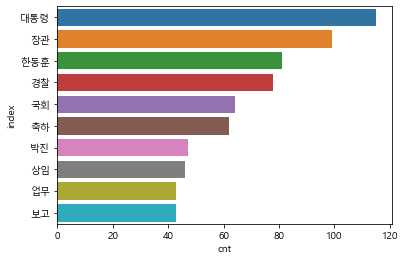

카테고리 : 정치


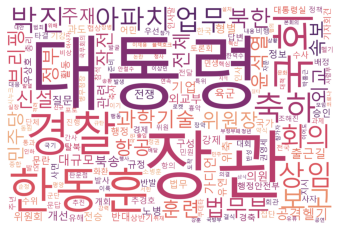

,index,cnt
0,금융,132
1,상반기,56
2,영업,51
3,금리,45
4,지원,38
5,현대,35
6,투자,34
7,공급,33
8,한국,32
9,서울,31


<AxesSubplot:xlabel='cnt', ylabel='index'>

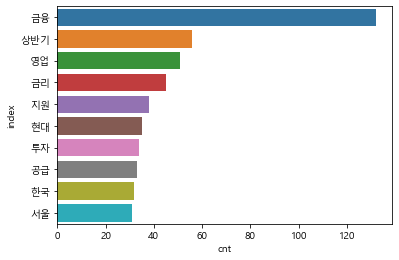

카테고리 : 경제


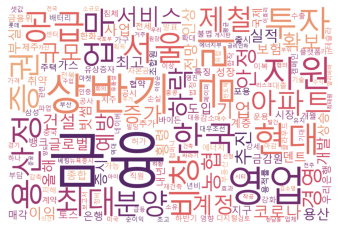

,index,cnt
0,중복,66
1,폭염,61
2,날씨,59
3,소나기,51
4,우영,46
5,팽나무,41
6,오늘,40
7,공연,33
8,더위,33
9,물놀이,32


<AxesSubplot:xlabel='cnt', ylabel='index'>

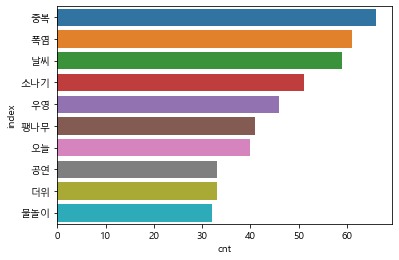

카테고리 : 생활


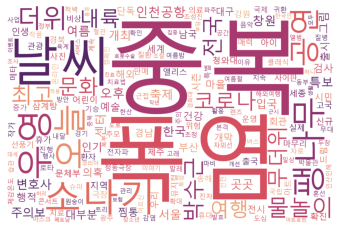

,index,cnt
0,반도체,42
1,투자,35
2,서비스,35
3,자동차,31
4,치료,27
5,가장,25
6,교육,24
7,유지,22
8,나무,22
9,계약,22


<AxesSubplot:xlabel='cnt', ylabel='index'>

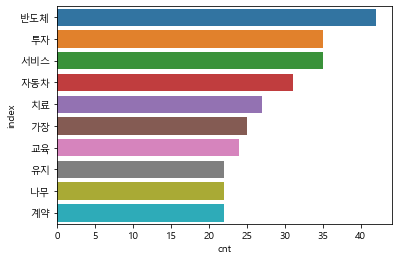

카테고리 : 과학


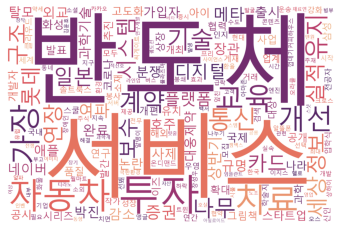

In [452]:
import re
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

mask_poli = (news_df.category==264)|(news_df.category==265)|(news_df.category==267)|(news_df.category==268)
mask_econo = (news_df.category==259)|(news_df.category==258)|(news_df.category==261)|(news_df.category==262)|(news_df.category==260)
mask_life = (news_df.category==241)|(news_df.category==237)|(news_df.category==242)|(news_df.category==248)|(news_df.category==245)
mask_sci = (news_df.category==227)|(news_df.category==230)|(news_df.category==283)|(news_df.category==228)

li = [mask_poli,mask_econo,mask_life,mask_sci]
cat= {0:'정치',1:'경제',2:'생활',3:'과학'}
for i in range(4):
        title_list = news_df[li[i]]['news'].tolist()
        text = ' '.join(title_list)
        text = re.sub('[^0-9가-힣]+',' ',text)

        okt = Okt()
        morph = okt.pos(text)
        noun_list = []
        for word, tag in morph:
            if (tag == 'Noun') & (len(word) > 1):
                noun_list.append(word)
        # print(morph)
        # print(noun_list[:100])

        count = Counter(noun_list)
        data = dict(count.most_common())
        
        series = pd.Series(data)
        df = pd.DataFrame(series, columns=['cnt'])
        df10 = df.sort_values(by='cnt',ascending=False)[:10]
        df10.reset_index(inplace=True)
        display(df10)
        
        display(sns.barplot(y='index', x='cnt', data=df10, orient='h'))
        plt.show();
        wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color='white',
                             colormap='flare',width=1500,height=1000).generate_from_frequencies(data)
        print(f'카테고리 : {cat[i]}')
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show();


In [20]:
#불용어 사전
with open('notuse.txt','rt',encoding='UTF8') as f:
    rl = f.readlines()

file = re.sub('[^가-힣]',' ', str(rl))
file = re.sub('\s+',' ', file)
file

' 아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 여 얼마간 약간 다소 좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 

In [25]:
#불용어 처리
from konlpy.tag import Okt
import pandas as pd
okt = Okt()

stop_words = file, '억원'
word_token = okt.morphs(str(m))

s = [word for word in word_token if not word in stop_words]
s

['대통령',
 '기업',
 '활동',
 '위축',
 '시키는',
 '과도',
 '한',
 '형벌',
 '규정',
 '개선',
 '지시',
 '국방부',
 '유엔',
 '사',
 '판문점',
 '통과',
 '허용',
 '북송',
 '승인',
 '의미',
 '는',
 '아냐',
 '포토',
 '육군',
 '대규모',
 '항공',
 '작전',
 '훈련',
 '유럽',
 '에',
 '이어',
 '아세안',
 '과도',
 '정상',
 '간',
 '비즈니스',
 '외교',
 '시작',
 '국내',
 '대',
 '종단',
 '지도자',
 '들',
 '이명박',
 '이재용',
 '김경수',
 '통큰',
 '사면',
 '요청',
 '정치',
 '윤',
 '대통령',
 '국기',
 '문란',
 '경찰',
 '질타',
 '경찰',
 '내부',
 '반발',
 '고조',
 '대통령',
 '최측근',
 '한동훈',
 '법무',
 '장관',
 '에',
 '무슨',
 '지시',
 '했나',
 '대통령',
 '법무',
 '행정',
 '최',
 '우선',
 '은',
 '경제',
 '살리기',
 '기업',
 '위축',
 '하는',
 '형벌',
 '규정',
 '개선',
 '문체부',
 '청와대',
 '활용',
 '정부',
 '내',
 '혼선',
 '없어',
 '이미',
 '정리',
 '법무부',
 '업무',
 '보고',
 '한동훈',
 '공',
 '수',
 '처',
 '년',
 '국가',
 '범죄',
 '대응',
 '역량',
 '약화',
 '쌍용차',
 '채권',
 '단',
 '변제',
 '율',
 '상식',
 '적',
 '이지',
 '않아',
 '대통령',
 '에',
 '탄원',
 '브리핑',
 '하는',
 '한동훈',
 '법무부',
 '장관',
 '항',
 '명',
 '이냐',
 '강압',
 '이냐',
 '대통령',
 '과',
 '만',
 '경찰',
 '대치',
 '전선',
 '고조',
 '종합',
 '한동훈',
 '에',
 '기업',
 '활동',
 '위축',
 '과도',
 '한',
 '형

In [30]:
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(str(s))
noun_list = []
for word, tag in morph:
    if (tag=='Noun')& (len(word)>1):
        noun_list.append(word)
# print(morph)
print(noun_list)

['대통령', '기업', '활동', '위축', '과도', '형벌', '규정', '개선', '지시', '국방부', '유엔', '판문점', '통과', '허용', '북송', '승인', '의미', '포토', '육군', '대규모', '항공', '작전', '훈련', '유럽', '아세안', '과도', '정상', '비즈니스', '외교', '시작', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '사면', '요청', '정치', '대통령', '국기', '문란', '경찰', '질타', '경찰', '내부', '반발', '고조', '대통령', '최측근', '한동훈', '법무', '장관', '무슨', '지시', '대통령', '법무', '행정', '우선', '경제', '기업', '위축', '형벌', '규정', '개선', '문체부', '청와대', '활용', '정부', '혼선', '정리', '법무부', '업무', '보고', '한동훈', '국가', '범죄', '대응', '역량', '약화', '쌍용차', '채권', '변제', '상식', '이지', '대통령', '탄원', '브리핑', '한동훈', '법무부', '장관', '강압', '대통령', '경찰', '대치', '전선', '고조', '종합', '한동훈', '기업', '활동', '위축', '과도', '형벌', '개선', '대통령', '경찰', '집단', '행동', '국기', '문란', '경찰', '신설', '국무회의', '통과', '수완', '이전', '회귀', '한동훈', '수사권', '강화', '보고', '국내', '종단', '지도자', '이명박', '이재용', '김경수', '통큰', '특별사면', '탄원', '대통령', '한동훈', '법무', '행정', '우선', '경제', '당부', '한동훈', '티타임', '부활', '지적', '언론', '불편', '질문', '박홍근', '경찰', '신설', '이상민', '행안부', '장관', '행정', '쿠데타', '포토', '육군', '기지', '대규모', '항공'

In [27]:
import pandas as pd
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font', family = 'Malgun Gothic') #한글 폰트 설정
# plt.rcParams['axes.unicode_minus'] = False #마이너스 부호 출력 설정

count = Counter(noun_list)
# print(count)
data = dict(count.most_common())
print(data)
# series = pd.Series(data)
# df = pd.DataFrame(series, columns=['cnt'])
# df10 = df.sort_values(by='cnt', ascending = False)[:10]
# df10.reset_index(inplace=True)
# df10

{'금융': 126, '대통령': 89, '상반기': 74, '경찰': 69, '업무': 69, '장관': 68, '한동훈': 65, '한국': 63, '분기': 62, '기업': 59, '폭염': 56, '중복': 54, '날씨': 53, '영업': 52, '서비스': 52, '코로나': 49, '서울': 47, '투자': 47, '소나기': 45, '국회': 44, '최고': 44, '최대': 42, '지원': 41, '속보': 40, '사업': 40, '현대': 40, '추진': 39, '전국': 39, '증권': 39, '개선': 38, '출시': 37, '정부': 36, '오늘': 36, '신설': 35, '국제': 35, '회의': 34, '개발': 34, '개최': 33, '증가': 33, '용산정': 33, '비창': 33, '확대': 32, '보고': 31, '종합': 31, '박진': 30, '공급': 30, '북한': 29, '공연': 29, '디지털': 29, '우영': 29, '제철': 29, '분양': 29, '기술': 29, '강화': 28, '축하': 28, '협약': 28, '금리': 28, '외교': 27, '제주': 27, '네이버': 27, '아파치': 26, '더위': 26, '공개': 25, '정보': 25, '과학기술': 25, '안정': 25, '문화': 25, '규모': 25, '실적': 25, '아이': 25, '여름': 25, '특보': 25, '부산': 25, '위축': 24, '가능': 24, '경영': 24, '센터': 24, '무더위': 24, '훈련': 23, '진행': 23, '건설': 23, '계정': 23, '매각': 23, '삼성': 23, '형벌': 22, '법무부': 22, '용산': 22, '전망': 22, '도입': 22, '농협': 22, '올해': 22, '빗썸': 22, '아파트': 22, '클라우드': 22, '내륙': 22, '오후': 22, '활동': 21, '항공': 21, '

(-0.5, 1499.5, 999.5, -0.5)

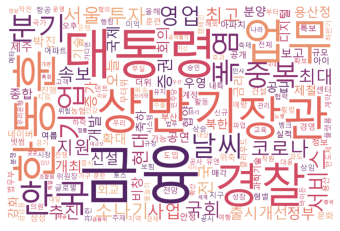

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='../visualization/dataset/malgun.ttf', background_color = 'white',
                     colormap = 'flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')


In [ ]:
html="""
<head>
    <title>crawler</title>
</head>
<body>
    <p class="a" align="center"> text1</p>
    <p class="b" align="center"> text2</p>
    <p class="c" align="center"> text3</p>
    <div>
        <img src="/source" width="300" height="200">
    </div>
</body>
</html>
"""

In [39]:
from bs4 import BeautifulSoup

bs = BeautifulSoup(html, 'html.parser')
contents = bs.find('body')
for child in contents.children:
    print(child)



<p align="center" class="a"> text1</p>


<p align="center" class="b"> text2</p>


<p align="center" class="c"> text3</p>


<div>
<img height="200" src="/source" width="300"/>
</div>




In [40]:
#후손이 따로 나옴
#body의 자손은 p, div, img
for d in contents.descendants:
    print(d)



<p align="center" class="a"> text1</p>
 text1


<p align="center" class="b"> text2</p>
 text2


<p align="center" class="c"> text3</p>
 text3


<div>
<img height="200" src="/source" width="300"/>
</div>


<img height="200" src="/source" width="300"/>






In [46]:
img_tag = contents.find('img')
img_tag

<img height="200" src="/source" width="300"/>

In [48]:
print(list(img_tag.parents))

<div>
<img height="200" src="/source" width="300"/>
</div>


In [50]:
contents

<body>
<p align="center" class="a"> text1</p>
<p align="center" class="b"> text2</p>
<p align="center" class="c"> text3</p>
<div>
<img height="200" src="/source" width="300"/>
</div>
</body>

In [49]:
# 태그 객체
contents.div.img

<img height="200" src="/source" width="300"/>

In [57]:
p_tag = bs.find('p', class_='b')
p_tag

<p align="center" class="b"> text2</p>

In [60]:
# find_previous_sibling(): 바로 이전 형제 노트를 검색
# find_previous_siblings() : 모든 이전 형제 노트를 검색
p_tag = bs.find('p', class_='c')
print(p_tag.find_previous_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="b"> text2</p>
[<p align="center" class="b"> text2</p>, <p align="center" class="a"> text1</p>]


In [61]:
# find_next_sibling(): 바로 앞에 형제 노트를 검색
# find_previous_siblings() : 모든 이전 형제 노트를 검색
p_tag = bs.find('p', class_='a')
print(p_tag.find_next_sibling())
print(p_tag.find_previous_siblings())

<p align="center" class="b"> text2</p>
[]


In [64]:
import urllib
from bs4 import BeautifulSoup

response = urllib.request.urlopen('http://naver.com')
byte_data = response.read()
html = byte_data.decode('utf-8')
bs = BeautifulSoup(html, 'html.parser')
print(bs.find_all('a',{'class':'link_newsstand'}))

[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>]


In [67]:
nlist = bs.find_all('a',{'class':{'link_newsstand','btn_sort','btn_sort.sort_on'}})
for n in nlist:
    print(n.get_text())
print(bs.find_all('a',{'class':{'link_newsstand','btn_sort','btn_sort.sort_on'}}))


뉴스스탠드
구독한 언론사
전체언론사
[<a class="link_newsstand" data-clk="title" href="http://newsstand.naver.com/" target="_blank">뉴스스탠드</a>, <a aria-controls="NM_NEWSSTAND_MY_LIST" aria-selected="false" class="btn_sort" data-clk="my" data-type="my" href="#" role="tab">구독한 언론사</a>, <a aria-controls="NM_NEWSSTAND_DEFAULT_THUMB" aria-selected="true" class="btn_sort" data-clk="all" data-type="all" href="#" role="tab">전체언론사</a>]


In [73]:
hlist = bs.findAll({'h1','h2','h3','h4','h5','h6'}, limit=5)
for h in hlist:
    print(h.get_text(), '\n')


네이버
 

뉴스스탠드 

주제별 캐스트 

Sign in 

타임스퀘어 



#### 과제0721_1 코스피 지수, 등락폭 및 등락율을 출력하세요.

In [246]:
import requests
from bs4 import BeautifulSoup
import re

# 네이버 금융 국내증시 메인 사이트 주소
# url = "https://finance.naver.com/sise/"
url = 'https://finance.naver.com/sise/sise_index.naver?code=KOSPI'
html = requests.get(url)
html = html.text
bs = BeautifulSoup(html, 'lxml')
a = bs.select_one('#quotient')
print(a)
print(f'Kospi 지수: {a.em.text}')
print(f'{a.span.span.text} 포인트 변동')
print(f'{a.span.text[5:11]} 퍼센트 변동')

<div class="quotient dn" id="quotient">
<em id="now_value">2,407.61</em>
<span class="fluc" id="change_value_and_rate"><span>5.35</span> -0.22%<span class="blind">상승</span></span>
</div>
Kospi 지수: 2,407.61
5.35 포인트 변동
-0.22% 퍼센트 변동


In [221]:
# li = []
# for i in a:
#     li.append(re.sub('[^\d+\w+.%,]',' ',j.get_text()))
# print(li)
# li = str(li).split(' ')

# print(f'코스피{li[1]}/{li[2]}/{li[4]}')

[' 2,401.55 11.41  0.47%상승 ', ' 2,401.55 11.41  0.47%상승 ', ' 2,401.55 11.41  0.47%상승 ', ' 2,401.55 11.41  0.47%상승 ', ' 2,401.55 11.41  0.47%상승 ']
코스피2,401.55/11.41/0.47%상승


In [109]:
from bs4 import BeautifulSoup

fp = open('books.html', encoding='utf-8')
bs = BeautifulSoup(fp, 'html.parser')
print(bs, '\n')
sel = lambda q:print(bs.select_one(q).string)
sel('#nu')

<ul id="bible">
<li id="ge">Genesis</li>
<li id="ex">Exodus</li>
<li id="le">Leviticus</li>
<li id="nu">Numbers</li>
<li id="de">Deuteronomy</li>
</ul> 

Numbers


In [113]:
# 9가지 방식으로 Numbers를 뽑아보세요.
sel('#nu')
sel('li#nu')
sel('#bible > #nu')
sel('#bible #nu')
sel('ul li#nu')
sel('ul > li#nu')
sel('ul #nu')
sel('ul > #nu')
sel('li:nth-child(4)')
sel('ul li:nth-child(4)')


Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers
Numbers


#### 과제0727_2
검색 키워드와 총 필요한 뉴스기사 수를 입력하면 요청한 만큼 데이터프레임 형태(컬럼은 title, url)로 출력해주는 크롤링 프로그램을 수행하세요.

In [ ]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='



